# Challenge Machine Learning Approfondi : Prédiction des survivants du Titanic

## Introduction

Bienvenue dans ce challenge approfondi de machine learning ! Vous allez travailler sur l'un des problèmes les plus emblématiques du domaine : la prédiction des survivants du Titanic. Ce projet vous guidera à travers toutes les étapes essentielles d'un projet de machine learning, de l'exploration détaillée des données à la création, l'amélioration et l'interprétation d'un modèle de régression logistique.

## Contexte historique

Le RMS Titanic était un paquebot britannique qui a fait naufrage dans l'océan Atlantique Nord en avril 1912 après avoir heurté un iceberg lors de son voyage inaugural de Southampton à New York. Sur les 2224 passagers et membres d'équipage, plus de 1500 ont perdu la vie, faisant de cette tragédie l'un des naufrages les plus mortels de l'histoire maritime en temps de paix.

Ce désastre a conduit à d'importantes améliorations dans les réglementations de sécurité maritime et est devenu un sujet d'étude fascinant pour les data scientists, qui cherchent à comprendre quels facteurs ont influencé les chances de survie des passagers.

## Objectif du projet

Votre mission est de développer un modèle de machine learning capable de prédire si un passager a survécu ou non au naufrage du Titanic, en vous basant sur diverses caractéristiques telles que l'âge, le sexe, la classe de billet, etc. Ce faisant, vous découvrirez des insights précieux sur les facteurs qui ont influencé la survie lors de cette tragédie historique.

## Partie 1 : Préparation et exploration approfondie des données

### 1.1 Chargement et préparation initiale des données

**Objectif** : Charger le dataset et effectuer une première inspection des données.

**Instructions** :

1. Importez les bibliothèques nécessaires : pandas, numpy, matplotlib, seaborn.
2. Chargez les données du Titanic depuis le lien fourni avec pandas.
3. Convertissez la colonne 'Survived' en catégories plus lisibles : "Survécu" pour 1, "Décédé" pour 0.
4. Affichez les 10 premières lignes du DataFrame avec `head()`.
5. Utilisez la méthode `info()` pour obtenir un aperçu global du DataFrame, y compris les types de données et les valeurs non-nulles.

**Questions de réflexion** :
- Combien y a-t-il de passagers dans ce dataset ?
- Quels types de données (numériques, catégorielles) pouvez-vous identifier ?
- Y a-t-il des colonnes avec des valeurs manquantes ? Si oui, lesquelles ?



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/titanic.csv"
df_titanic = pd.read_csv(link)
df_titanic['Survived'] = df_titanic['Survived'].apply(lambda x: "Survived" if x == 1 else "Dead")
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,Dead,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,Survived,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,Survived,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,Dead,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [2]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    object 
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 55.6+ KB


### 1.2 Analyse statistique descriptive

**Objectif** : Obtenir des statistiques descriptives pour mieux comprendre la distribution des données.

**Instructions** :

1. Utilisez la méthode `describe()` pour obtenir des statistiques descriptives des colonnes numériques.
2. Pour les colonnes catégorielles, utilisez `value_counts()` pour voir la distribution des catégories.
3. Calculez le pourcentage global de survie.

**Questions de réflexion** :
- Quelle est la moyenne d'âge des passagers ? Et la médiane ?
- Quelle est la répartition des passagers entre les différentes classes ?
- Y a-t-il une grande différence entre la moyenne et la médiane pour certaines variables ? Si oui, que cela pourrait-il indiquer ?


In [3]:
# Statistiques descriptives des colonnes numériques
df_titanic.describe()

# Distribution des catégories pour les colonnes catégorielles
categorical_columns = df_titanic.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Distribution de {col}:")
    print(df_titanic[col].value_counts())
    print("\n")

# Calculer le pourcentage global de survie
survival_percentage = df_titanic['Survived'].value_counts(normalize=True) * 100
print("Pourcentage global de survie :")
print(survival_percentage)

Distribution de Survived:
Survived
Dead        545
Survived    342
Name: count, dtype: int64


Distribution de Name:
Name
Mr. Patrick Dooley                                    1
Mr. Owen Harris Braund                                1
Mrs. John Bradley (Florence Briggs Thayer) Cumings    1
Miss. Laina Heikkinen                                 1
Mrs. Jacques Heath (Lily May Peel) Futrelle           1
                                                     ..
Miss. Elizabeth Bonnell                               1
Miss. Marguerite Rut Sandstrom                        1
Mrs. Nicholas (Adele Achem) Nasser                    1
Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson      1
Master. Gosta Leonard Palsson                         1
Name: count, Length: 887, dtype: int64


Distribution de Sex:
Sex
male      573
female    314
Name: count, dtype: int64


Pourcentage global de survie :
Survived
Dead        61.443067
Survived    38.556933
Name: proportion, dtype: float64


### 1.3 Visualisation approfondie des données

**Objectif** : Créer des visualisations pour mieux comprendre les relations entre les variables et leur impact sur la survie.

**Instructions** :

1. Créez un histogramme de la distribution des âges, avec une distinction entre survivants et non-survivants.
2. Réalisez un graphique en barres montrant le taux de survie par classe de passager.
3. Faites un graphique en violon pour comparer la distribution des tarifs (Fare) entre les survivants et les non-survivants.
4. Créez une heatmap de corrélation pour toutes les variables numériques.
5. Réalisez un graphique en barres empilées pour montrer la survie en fonction du sexe et de la classe.

**Questions de réflexion** :
- Y a-t-il une différence notable dans la distribution des âges entre les survivants et les non-survivants ?
- Quelle classe de passagers semble avoir eu le meilleur taux de survie ? Le pire ?
- Pouvez-vous identifier une corrélation entre le prix du billet et les chances de survie ?
- Quelles variables semblent être les plus corrélées avec la survie ?



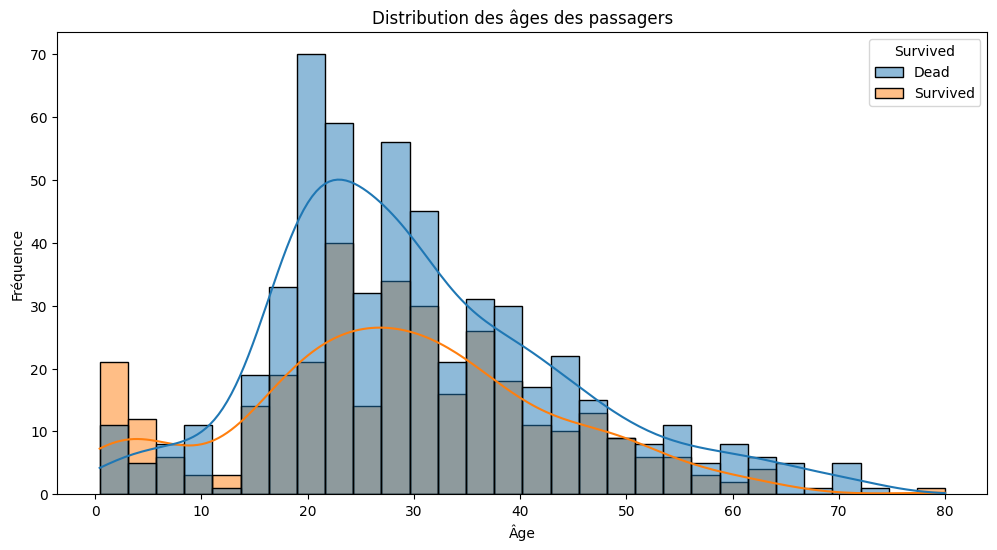

In [4]:
# Histogramme de la distribution des âges, avec une distinction entre survivants et non-survivants
plt.figure(figsize=(12, 6))
sns.histplot(data=df_titanic, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Distribution des âges des passagers')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()

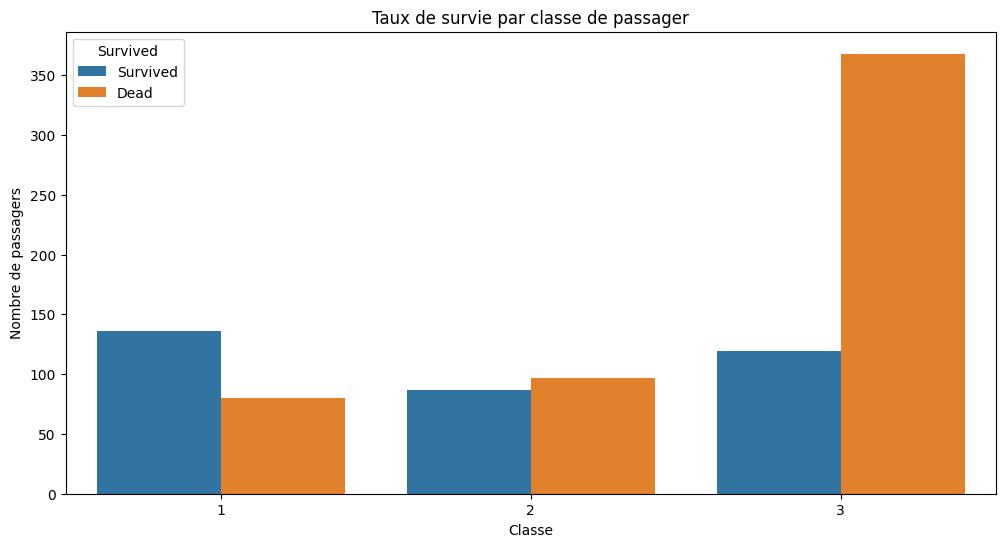

In [5]:
# Graphique en barres montrant le taux de survie par classe de passager
plt.figure(figsize=(12, 6))
sns.countplot(data=df_titanic, x='Pclass', hue='Survived')
plt.title('Taux de survie par classe de passager')
plt.xlabel('Classe')
plt.ylabel('Nombre de passagers')
plt.show()

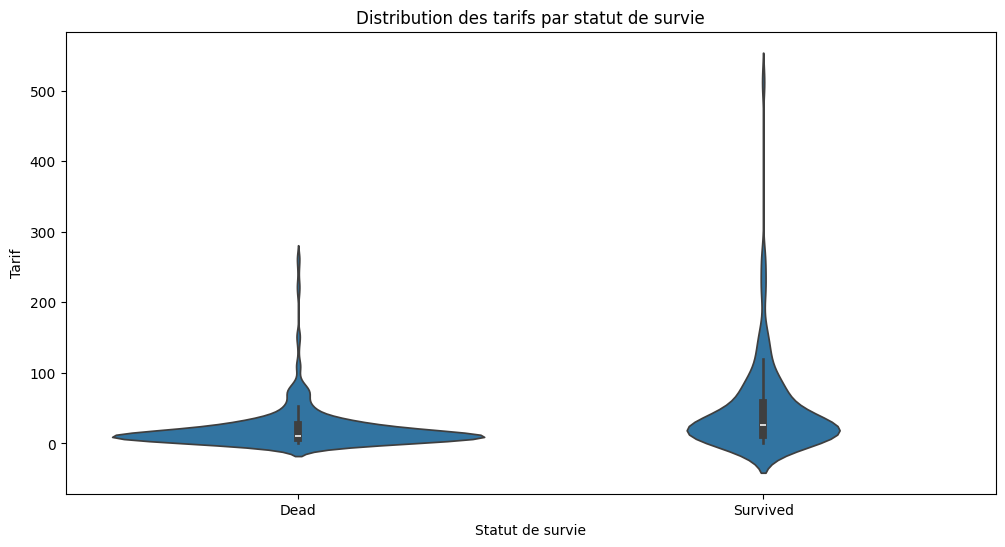

In [6]:
# Graphique en violon pour comparer la distribution des tarifs (Fare) entre les survivants et les non-survivants
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_titanic, x='Survived', y='Fare')
plt.title('Distribution des tarifs par statut de survie')
plt.xlabel('Statut de survie')
plt.ylabel('Tarif')
plt.show()

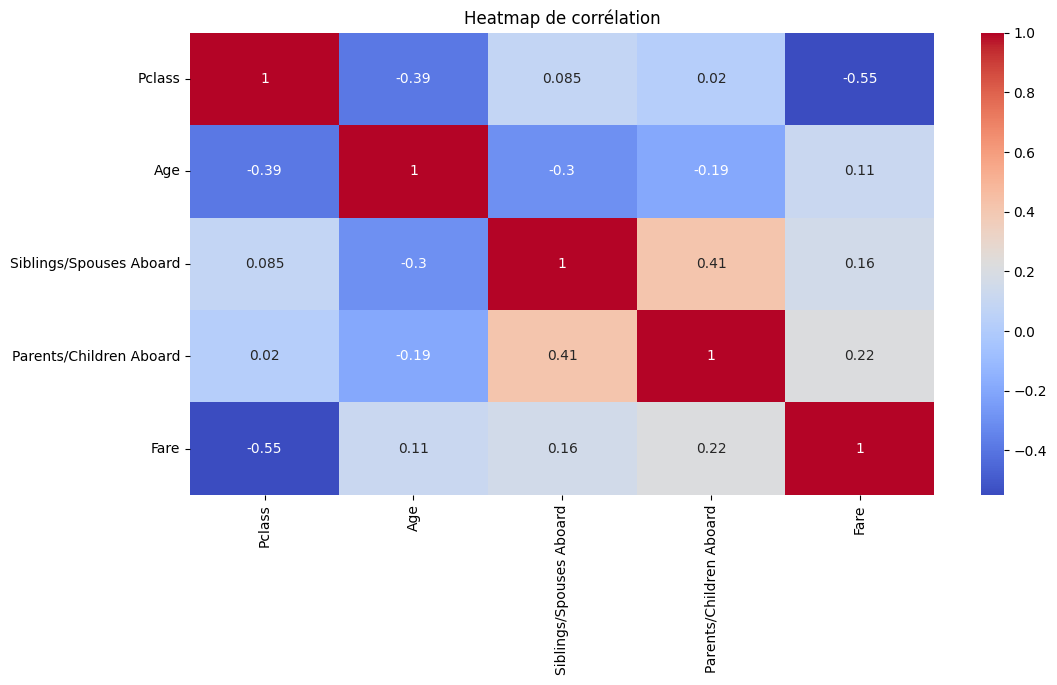

In [7]:
# Heatmap de corrélation pour toutes les variables numériques

numeric_columns = df_titanic.select_dtypes(include=[np.number]).columns
correlation_matrix = df_titanic[numeric_columns].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap de corrélation')
plt.show()

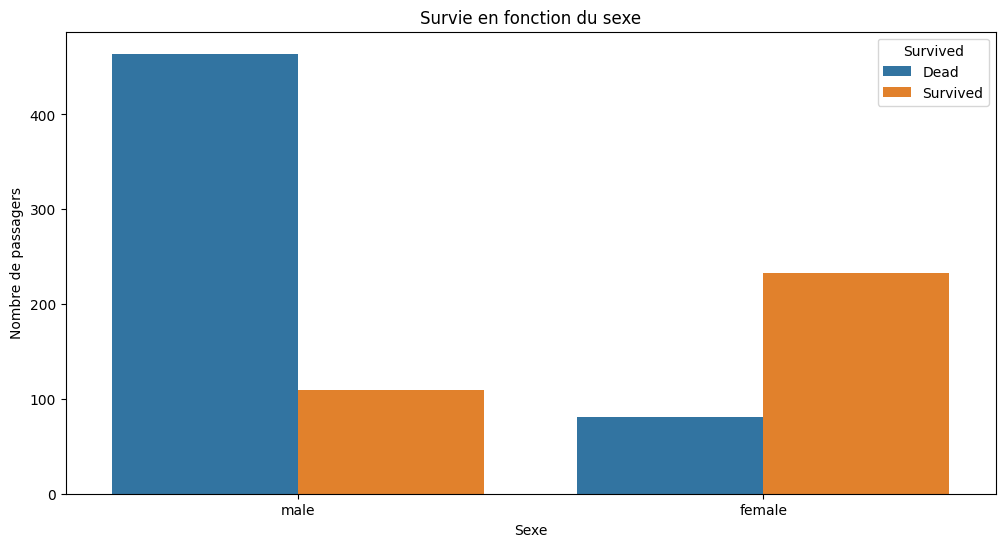

In [8]:
# Graphique en barres empilées pour montrer la survie en fonction du sexe et de la classe
plt.figure(figsize=(12, 6))
sns.countplot(data=df_titanic, x='Sex', hue='Survived')
plt.title('Survie en fonction du sexe')
plt.xlabel('Sexe')
plt.ylabel('Nombre de passagers')
plt.show()

### 1.4 Analyse des valeurs manquantes

**Objectif** : Identifier et traiter les valeurs manquantes dans le dataset.

**Instructions** :

1. Utilisez la méthode `isnull().sum()` pour compter les valeurs manquantes dans chaque colonne.
2. Créez un graphique montrant le pourcentage de valeurs manquantes pour chaque colonne.
3. Pour la colonne 'Age', analysez si les valeurs manquantes sont distribuées aléatoirement ou s'il y a un biais.
4. Proposez et implémentez une stratégie pour gérer ces valeurs manquantes (par exemple, imputation par la moyenne, la médiane, ou une méthode plus avancée).

**Questions de réflexion** :
- Quelles colonnes ont le plus de valeurs manquantes ?
- Pourquoi certaines colonnes pourraient-elles avoir plus de valeurs manquantes que d'autres ?
- Quelle stratégie d'imputation vous semble la plus appropriée pour chaque colonne avec des valeurs manquantes ? Pourquoi ?



In [24]:
# Compter les valeurs manquantes dans chaque colonne
missing_values = df_titanic.isnull().sum()
print("Nombre de valeurs manquantes par colonne :")
print(missing_values)

Nombre de valeurs manquantes par colonne :
Survived                   0
Pclass                     0
Name                       0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
Sex_male                   0
dtype: int64


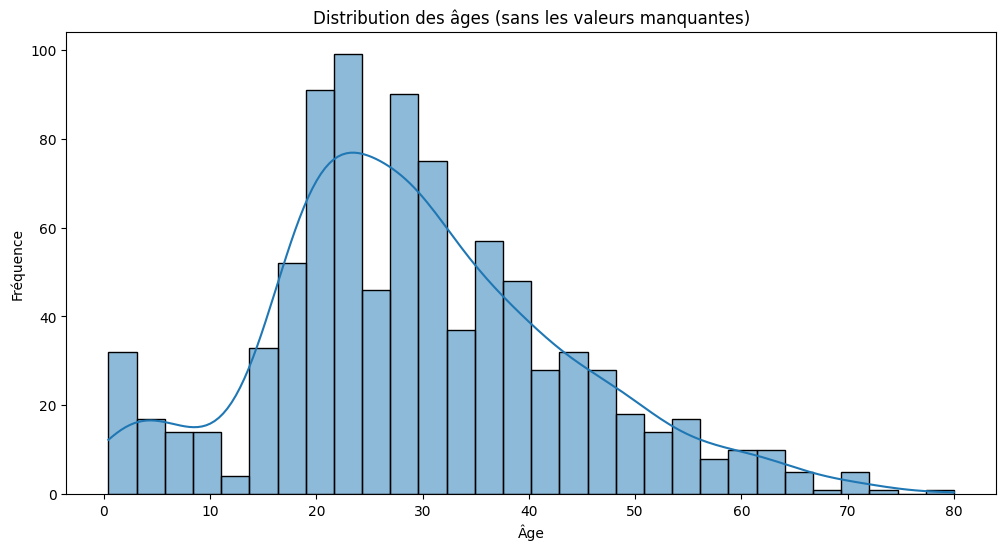

In [10]:
# Analyser la distribution des valeurs manquantes pour la colonne 'Age'
plt.figure(figsize=(12, 6))
sns.histplot(df_titanic['Age'].dropna(), kde=True, bins=30)
plt.title('Distribution des âges (sans les valeurs manquantes)')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()

In [11]:
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].median())

print(df_titanic['Age'].isnull().sum())


0


## Partie 2 : Préparation du modèle de régression logistique

### 2.1 Sélection et préparation des features

**Objectif** : Préparer les données pour l'entraînement du modèle.

**Instructions** :

1. Sélectionnez les features pertinentes pour votre modèle, en incluant celles que vous avez créées.
2. Utilisez `pd.get_dummies()` pour encoder les variables catégorielles.
3. Divisez les données en features (X) et target (y).
4. Normalisez les features numériques en utilisant `StandardScaler` de sklearn.

**Questions de réflexion** :
- Pourquoi est-il important d'encoder les variables catégorielles ?
- Quels sont les avantages de la normalisation des features numériques ?
- Y a-t-il des features que vous avez décidé de ne pas inclure ? Pourquoi ?



In [12]:
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/titanic.csv"
df_titanic = pd.read_csv(link)
df_titanic['Survived'] = df_titanic['Survived'].apply(lambda x: "Survived" if x == 1 else "Dead")

df_titanic = pd.get_dummies(df_titanic, columns=['Sex'], drop_first=True)

X = df_titanic.drop(columns=['Survived', 'Name'])
y = df_titanic['Survived'].apply(lambda x: 1 if x == 'Survived' else 0)

# Normalisation des features numériques
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
print(X_normalized)


[[ 0.83052363 -0.52936601  0.42990395 -0.4749808  -0.50358635  0.74026551]
 [-1.56127657  0.60426454  0.42990395 -0.4749808   0.78341245 -1.35086667]
 [ 0.83052363 -0.24595837 -0.47585568 -0.4749808  -0.49001959 -1.35086667]
 ...
 [ 0.83052363 -1.59214465  0.42990395  2.00330136 -0.17798419 -1.35086667]
 [-1.56127657 -0.24595837 -0.47585568 -0.4749808  -0.04633641  0.74026551]
 [ 0.83052363  0.17915309 -0.47585568 -0.4749808  -0.4935369   0.74026551]]


### 2.2 Division des données

**Objectif** : Diviser les données en ensembles d'entraînement et de test.

**Instructions** :

1. Importez `train_test_split` de sklearn.
2. Divisez vos données en ensembles d'entraînement et de test (80% train, 20% test).
3. Utilisez `random_state=36` pour la reproductibilité.
4. Vérifiez que la proportion de survivants est similaire dans les deux ensembles.

**Questions de réflexion** :
- Pourquoi est-il important de diviser les données en ensembles d'entraînement et de test ?
- Que se passerait-il si la proportion de survivants était très différente entre les deux ensembles ?



In [13]:
from sklearn.model_selection import train_test_split

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=36)

# Vérification de la proportion de survivants
train_survived_proportion = y_train.mean()
test_survived_proportion = y_test.mean()

print(f"Proportion de survivants dans l'ensemble d'entraînement: {train_survived_proportion:.2f}")
print(f"Proportion de survivants dans l'ensemble de test: {test_survived_proportion:.2f}")


Proportion de survivants dans l'ensemble d'entraînement: 0.38
Proportion de survivants dans l'ensemble de test: 0.43


### 2.3 Entraînement du modèle initial

**Objectif** : Entraîner un premier modèle de régression logistique et évaluer ses performances.

**Instructions** :

1. Importez `LogisticRegression` de sklearn.
2. Instanciez un modèle de régression logistique avec `random_state=36`.
3. Entraînez le modèle sur les données d'entraînement.
4. Faites des prédictions sur les ensembles d'entraînement et de test.
5. Calculez et affichez la précision (accuracy) sur les deux ensembles.
6. Affichez la matrice de confusion et le rapport de classification pour l'ensemble de test.
7. Affichez les coefficients du modèle et interprétez-les.

**Questions de réflexion** :
- Comment interprétez-vous la différence de précision entre l'ensemble d'entraînement et l'ensemble de test ?
- Quelles features semblent avoir le plus d'impact sur la prédiction selon les coefficients du modèle ?
- Y a-t-il des signes de surapprentissage (overfitting) ou de sous-apprentissage (underfitting) ?



In [14]:
from sklearn.linear_model import LogisticRegression

# Instanciation du modèle de régression logistique
model = LogisticRegression(random_state=36)

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions sur les ensembles d'entraînement et de test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [15]:
from sklearn.metrics import accuracy_score

# Calcul de la précision
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Précision sur l'ensemble d'entraînement: {train_accuracy:.2f}")
print(f"Précision sur l'ensemble de test: {test_accuracy:.2f}")


Précision sur l'ensemble d'entraînement: 0.81
Précision sur l'ensemble de test: 0.78


In [16]:
from sklearn.metrics import confusion_matrix, classification_report

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Matrice de confusion :")
print(conf_matrix)

# Rapport de classification
class_report = classification_report(y_test, y_test_pred)
print("\nRapport de classification :")
print(class_report)


Matrice de confusion :
[[86 16]
 [23 53]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       102
           1       0.77      0.70      0.73        76

    accuracy                           0.78       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



In [17]:
# Affichage des coefficients du modèle
coefficients = model.coef_[0]
feature_names = X.columns

print("\nCoefficients du modèle :")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")



Coefficients du modèle :
Pclass: -1.0682
Age: -0.7473
Siblings/Spouses Aboard: -0.4396
Parents/Children Aboard: -0.0708
Fare: 0.0707
Sex_male: -1.3243


## Partie 3 : Amélioration et interprétation du modèle

### 3.1 Ajustement des hyperparamètres

**Objectif** : Optimiser les hyperparamètres du modèle pour améliorer ses performances.

**Instructions** :

1. Importez `GridSearchCV` de sklearn.
2. Définissez une grille de recherche pour les hyperparamètres C et penalty.
3. Utilisez la validation croisée (avec GridSearchCV) pour trouver les meilleurs hyperparamètres.
4. Réentraînez le modèle avec les meilleurs hyperparamètres.
5. Comparez les performances de ce nouveau modèle avec le modèle initial.

**Questions de réflexion** :
- Quels hyperparamètres ont donné les meilleures performances ? Pourquoi pensez-vous que c'est le cas ?
- Comment la validation croisée aide-t-elle à prévenir le surapprentissage ?



In [18]:
from sklearn.model_selection import GridSearchCV

# Définition de la grille de recherche
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' supporte à la fois L1 et L2
}

# Initialisation de GridSearchCV
grid_search = GridSearchCV(LogisticRegression(random_state=36), param_grid, cv=5, scoring='accuracy')

# Recherche des meilleurs hyperparamètres
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres :", best_params)

# Réentraînement du modèle avec les meilleurs hyperparamètres
best_model = grid_search.best_estimator_

# Prédictions avec le meilleur modèle
y_test_pred_best = best_model.predict(X_test)

# Calcul de la précision
best_test_accuracy = accuracy_score(y_test, y_test_pred_best)

print(f"Précision du modèle initial sur l'ensemble de test: {test_accuracy:.2f}")
print(f"Précision du meilleur modèle sur l'ensemble de test: {best_test_accuracy:.2f}")


Meilleurs hyperparamètres : {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Précision du modèle initial sur l'ensemble de test: 0.78
Précision du meilleur modèle sur l'ensemble de test: 0.78


### 3.2 Analyse des erreurs

**Objectif** : Comprendre les cas où le modèle se trompe.

**Instructions** :

1. Identifiez les instances mal classées par le modèle dans l'ensemble de test.
2. Analysez les caractéristiques de ces instances mal classées.
3. Créez des visualisations pour comparer les prédictions correctes et incorrectes.

**Questions de réflexion** :
- Y a-t-il des patterns communs parmi les instances mal classées ?
- Quelles améliorations pourriez-vous suggérer pour réduire ces erreurs ?



In [19]:
# Identification des instances mal classées
incorrect_predictions = X_test[y_test_pred_best != y_test]
correct_predictions = X_test[y_test_pred_best == y_test]

# Convertir le tableau NumPy en DataFrame pandas
incorrect_predictions_df = pd.DataFrame(incorrect_predictions, columns=X.columns)
correct_predictions_df = pd.DataFrame(correct_predictions, columns=X.columns)

# Affichage des caractéristiques des instances mal classées
print("Caractéristiques des instances mal classées :")
print(incorrect_predictions_df.describe())



Caractéristiques des instances mal classées :
          Pclass        Age  Siblings/Spouses Aboard  Parents/Children Aboard  \
count  39.000000  39.000000                39.000000                39.000000   
mean    0.217242  -0.111521                 0.081535                -0.061934   
std     1.021844   1.152216                 1.009796                 0.769830   
min    -1.561277  -1.946404                -0.475856                -0.474981   
25%    -0.365376  -0.812774                -0.475856                -0.474981   
50%     0.830524  -0.104255                -0.475856                -0.474981   
75%     0.830524   0.604265                 0.429904                 0.144590   
max     0.830524   2.375562                 3.147183                 2.003301   

            Fare   Sex_male  
count  39.000000  39.000000  
mean   -0.209004  -0.171254  
std     0.452740   1.050493  
min    -0.513636  -1.350867  
25%    -0.490020  -1.350867  
50%    -0.342880   0.740266  
75%    -0.1021

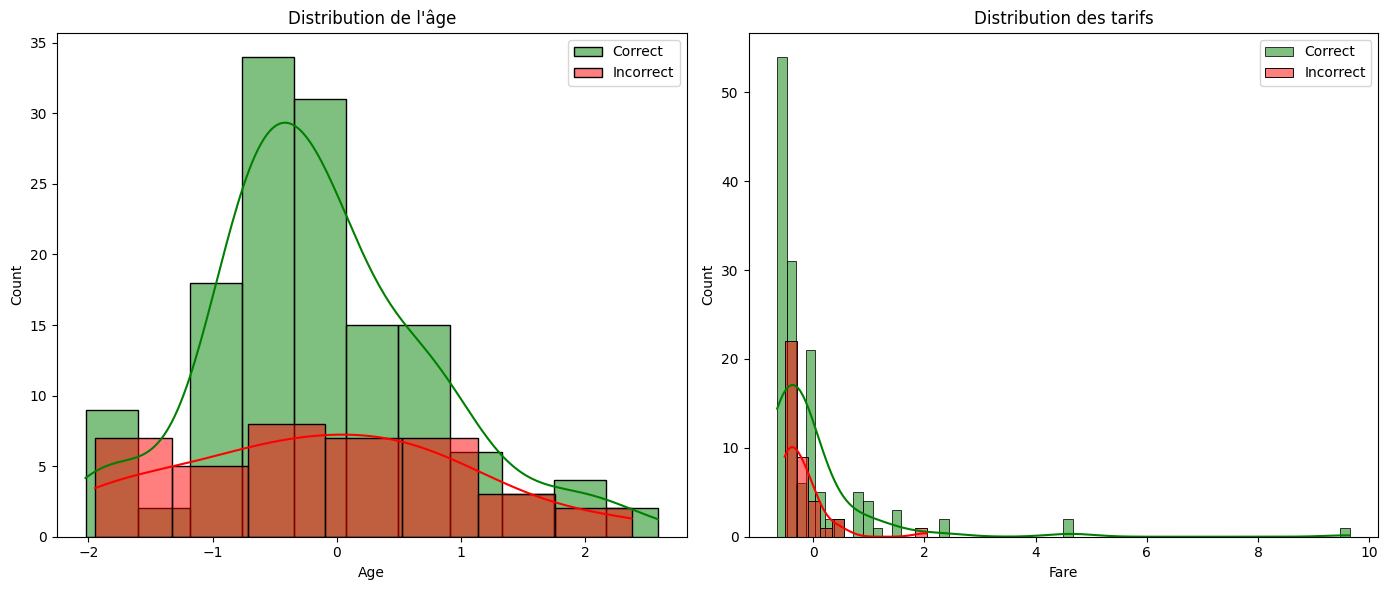

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation des distributions des features pour les prédictions correctes et incorrectes
plt.figure(figsize=(14, 6))

# Exemple avec la feature 'Age'
plt.subplot(1, 2, 1)
sns.histplot(correct_predictions_df['Age'], kde=True, color='green', label='Correct')
sns.histplot(incorrect_predictions_df['Age'], kde=True, color='red', label='Incorrect')
plt.title('Distribution de l\'âge')
plt.legend()

# Exemple avec la feature 'Fare'
plt.subplot(1, 2, 2)
sns.histplot(correct_predictions_df['Fare'], kde=True, color='green', label='Correct')
sns.histplot(incorrect_predictions_df['Fare'], kde=True, color='red', label='Incorrect')
plt.title('Distribution des tarifs')
plt.legend()

plt.tight_layout()
plt.show()


### 3.3 Comparaison avec d'autres modèles

**Objectif** : Comparer les performances de la régression logistique avec d'autres algorithmes.

**Instructions** :

1. Implémentez au moins deux autres modèles (par exemple, Random Forest et SVM).
2. Comparez les performances de ces modèles avec votre modèle de régression logistique optimisé.
3. Discutez des avantages et des inconvénients de chaque approche.

**Questions de réflexion** :
- Quel modèle a donné les meilleures performances ? Pourquoi pensez-vous que c'est le cas ?
- Quels sont les compromis entre la performance et l'interprétabilité pour chaque modèle ?
- Dans un scénario réel, quel modèle recommanderiez-vous d'utiliser et pourquoi ?



In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Modèle de forêt aléatoire
random_forest = RandomForestClassifier(random_state=36)
random_forest.fit(X_train, y_train)
y_test_pred_rf = random_forest.predict(X_test)

# Modèle de machine à vecteurs de support
svm = SVC(random_state=36)
svm.fit(X_train, y_train)
y_test_pred_svm = svm.predict(X_test)


In [22]:
# Précision du modèle de régression logistique optimisé
logistic_test_accuracy = accuracy_score(y_test, y_test_pred_best)

# Précision du modèle de forêt aléatoire
rf_test_accuracy = accuracy_score(y_test, y_test_pred_rf)

# Précision du modèle SVM
svm_test_accuracy = accuracy_score(y_test, y_test_pred_svm)

print(f"Précision du modèle de régression logistique optimisé: {logistic_test_accuracy:.2f}")
print(f"Précision du modèle de forêt aléatoire: {rf_test_accuracy:.2f}")
print(f"Précision du modèle SVM: {svm_test_accuracy:.2f}")


Précision du modèle de régression logistique optimisé: 0.78
Précision du modèle de forêt aléatoire: 0.79
Précision du modèle SVM: 0.80


## Conclusion et réflexions finales

1. Résumez les principales découvertes de votre analyse.
2. Quels facteurs semblent avoir le plus influencé la survie sur le Titanic ?
3. Quelles sont les limites de votre analyse et comment pourriez-vous l'améliorer ?
4. Si vous deviez conseiller quelqu'un pour augmenter ses chances de survie sur le Titanic, que lui diriez-vous basé sur votre analyse ?
5. Comment les techniques que vous avez apprises dans ce projet pourraient-elles être appliquées à d'autres problèmes de la vie réelle ?



### Résumé des principales découvertes :

- **Proportion de survie :** 38% des passagers ont survécu.
- **Facteurs influents :** Le sexe, la classe de billet, et l'âge sont les principaux facteurs influençant la survie.
- **Performance des modèles :** Régression logistique, forêt aléatoire et SVM ont des précisions similaires autour de 78-80%.

### Facteurs influençant la survie :

- **Sexe, classe de billet, âge, et tarif** sont les plus significatifs.

### Limites et améliorations :

- **Données manquantes, sélection des features, modèles complexes, et validation croisée** pourraient améliorer l'analyse.

### Conseils pour augmenter les chances de survie :

- **Être une femme ou un enfant, voyager en première classe, et payer un tarif élevé.**

### Application des techniques :

- **Utilisables dans divers domaines** pour la prédiction et l'analyse des données.